In [4]:
library(ISLR);
library(ggplot2);
library(caret);
library(lattice);
data(Wage)
summary(Wage)

      year           age               sex                    maritl    
 Min.   :2003   Min.   :18.00   1. Male  :3000   1. Never Married: 648  
 1st Qu.:2004   1st Qu.:33.75   2. Female:   0   2. Married      :2074  
 Median :2006   Median :42.00                    3. Widowed      :  19  
 Mean   :2006   Mean   :42.41                    4. Divorced     : 204  
 3rd Qu.:2008   3rd Qu.:51.00                    5. Separated    :  55  
 Max.   :2009   Max.   :80.00                                           
                                                                        
       race                   education                     region    
 1. White:2480   1. < HS Grad      :268   2. Middle Atlantic   :3000  
 2. Black: 293   2. HS Grad        :971   1. New England       :   0  
 3. Asian: 190   3. Some College   :650   3. East North Central:   0  
 4. Other:  37   4. College Grad   :685   4. West North Central:   0  
                 5. Advanced Degree:426   5. South Atlantic  

In [5]:
inTrain<-createDataPartition(y=Wage$wage,p=0.7,list=FALSE)
training<-Wage[inTrain,]
testing<-Wage[-inTrain,]
dim(training);
dim(testing);

[1] 2102   12

[1] 898  12

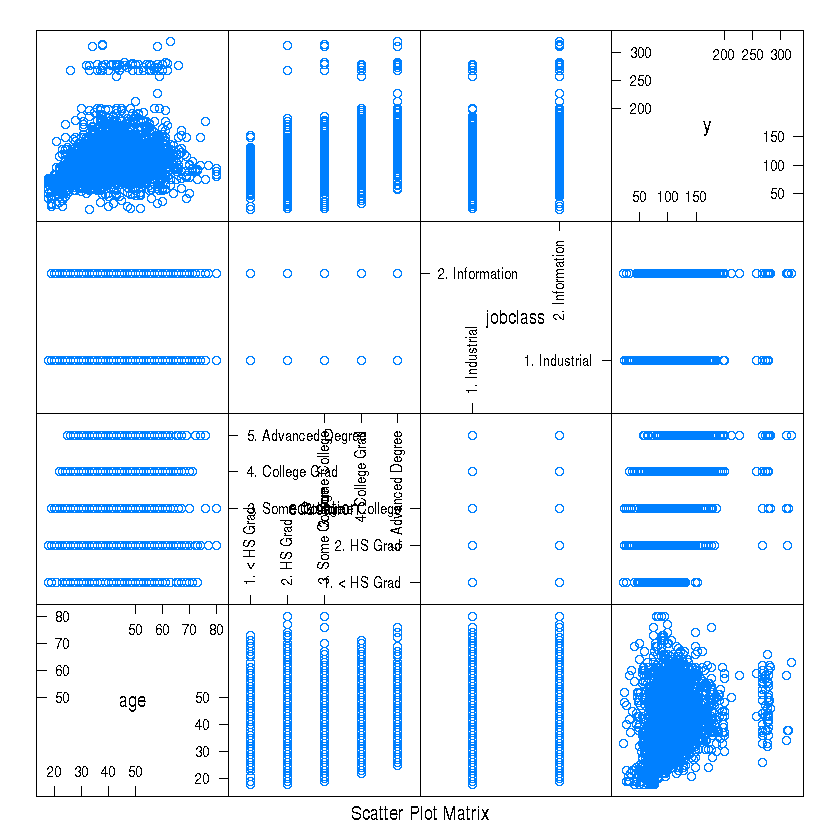

In [6]:
featurePlot(x=training[,c("age","education","jobclass")],y=training$wage,plot="pairs")

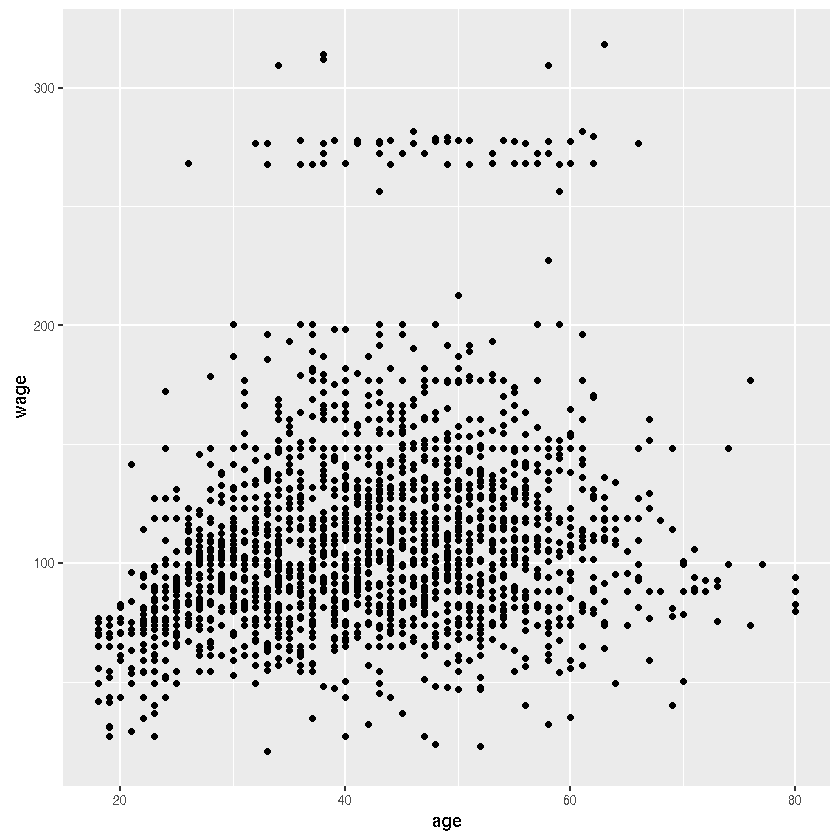

In [7]:
qplot(age,wage,data=training)

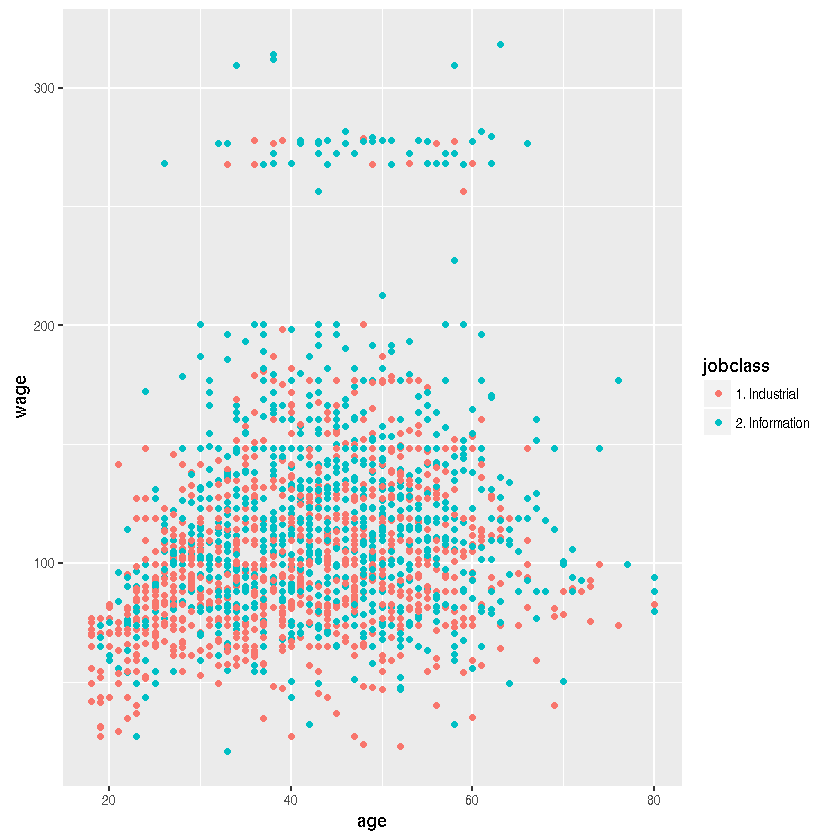

In [8]:
qplot(age,wage,colour=jobclass,data=training)

Warning message in grid.Call.graphics(L_polygon, x$x, x$y, index):
“semi-transparency is not supported on this device: reported only once per page”

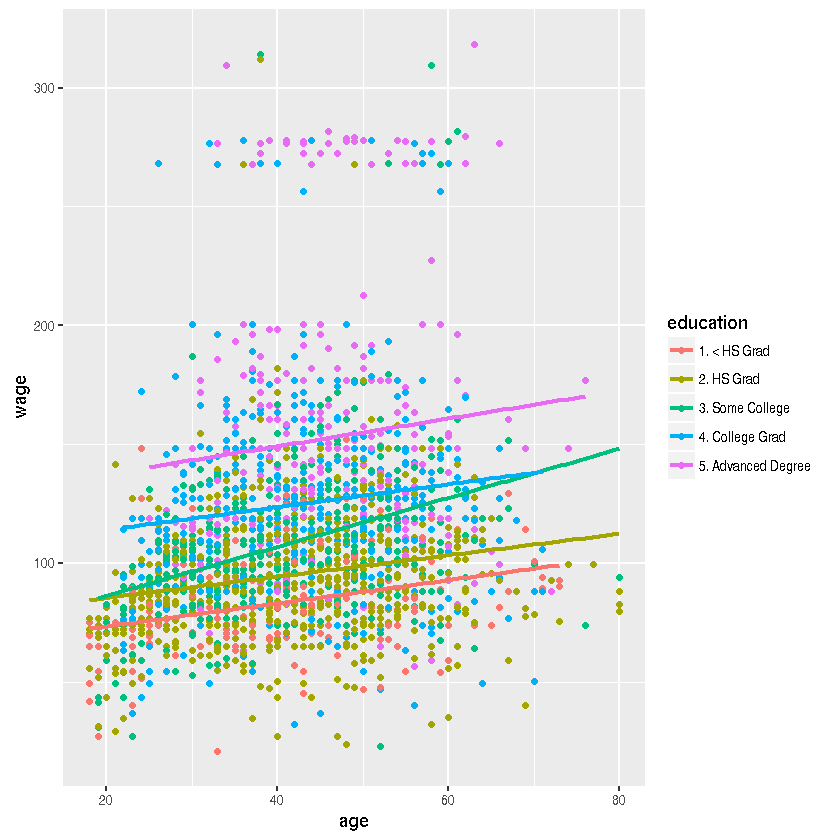

In [13]:
qq<-qplot(age,wage,colour=education,data=training)
qq + geom_smooth(method='lm',formula=y~x)

In [15]:
library(Hmisc)
cutWage<-cut2(training$wage,g=3)
table(cutWage)

Loading required package: survival

Attaching package: ‘survival’

The following object is masked from ‘package:caret’:

    cluster

Loading required package: Formula

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, round.POSIXt, trunc.POSIXt, units



cutWage
[ 20.9, 92.7) [ 92.7,118.9) [118.9,318.3] 
          701           740           661 

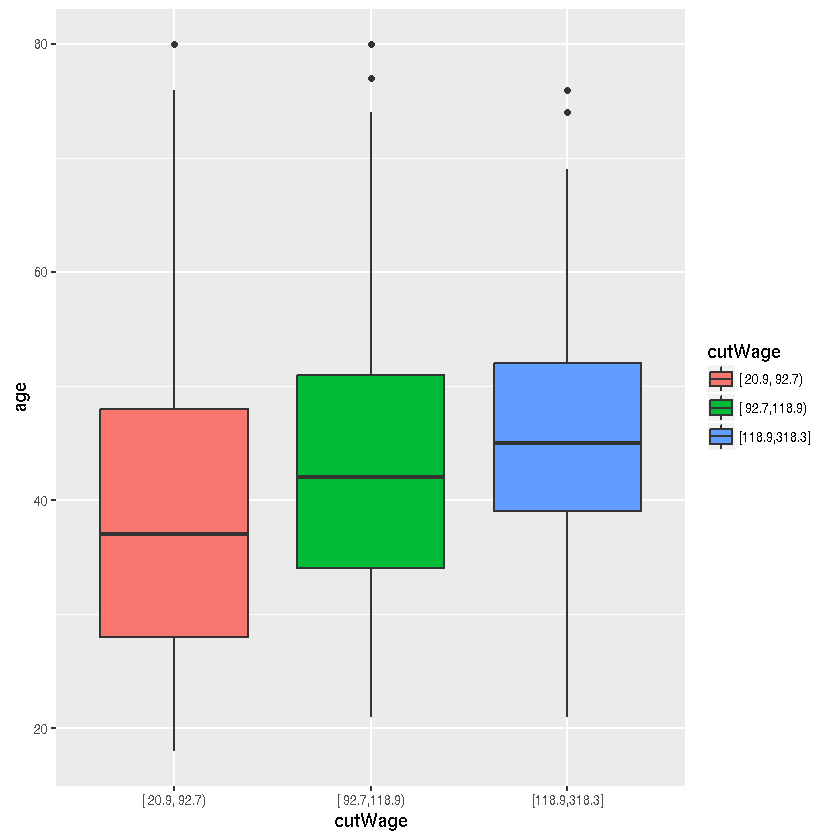

ERROR: Error in eval(expr, envir, enclos): could not find function "grid.arrange"


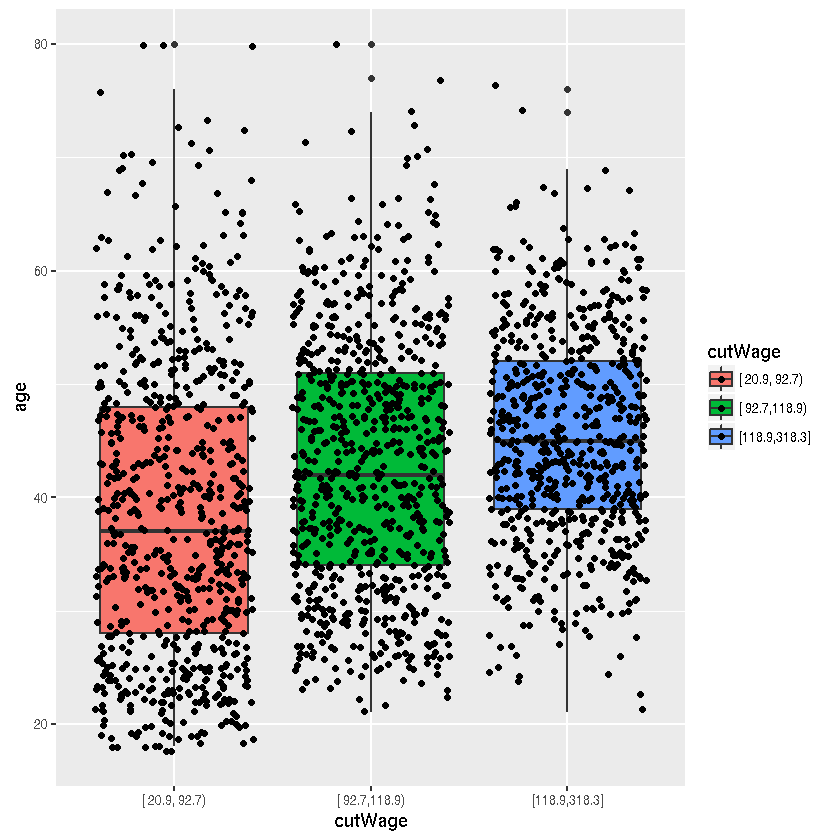

In [21]:
p1<-qplot(cutWage,age,data=training,fill=cutWage,geom=c("boxplot"))
p1
p2<-qplot(cutWage,age,data=training,fill=cutWage,geom=c("boxplot","jitter"))
p2
grid.arrange(p1,p2,ncol=2)

In [23]:
t1<-table(cutWage,training$jobclass)
t1

               
cutWage         1. Industrial 2. Information
  [ 20.9, 92.7)           444            257
  [ 92.7,118.9)           380            360
  [118.9,318.3]           261            400

In [24]:
prop.table(t1,1)

               
cutWage         1. Industrial 2. Information
  [ 20.9, 92.7)     0.6333809      0.3666191
  [ 92.7,118.9)     0.5135135      0.4864865
  [118.9,318.3]     0.3948563      0.6051437

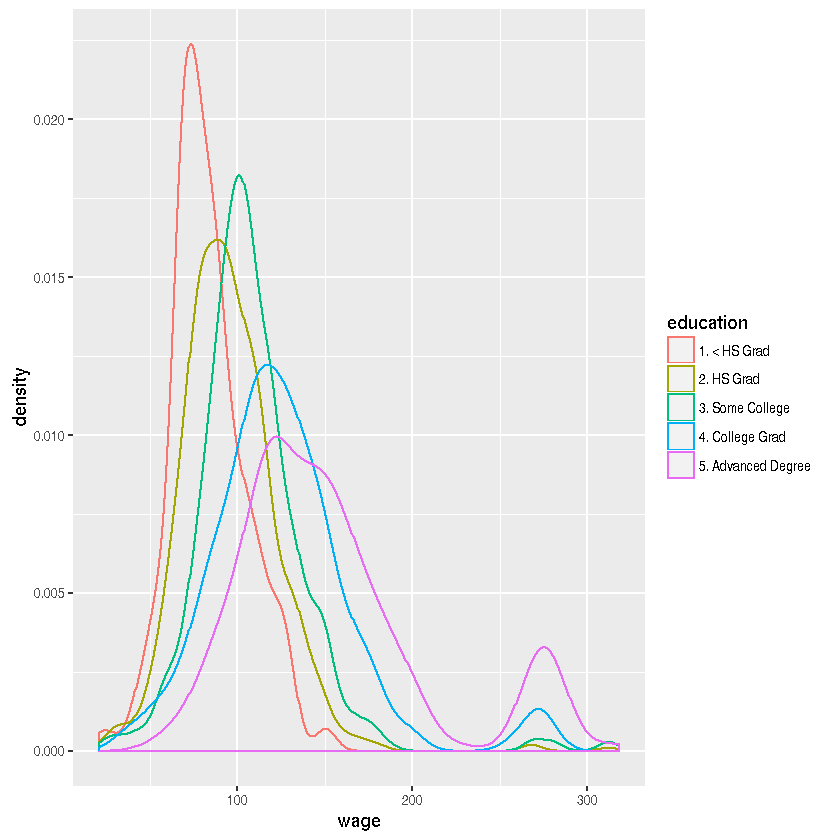

In [25]:
qplot(wage,colour=education,data=training,geom="density")